In [2]:
import os
import glob
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
sns.set_theme(style="darkgrid")

In [3]:
exptime = "2024-08-04-openloop_tc"
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
directory_path = os.path.join(parent_dir, "results", exptime)
files = os.listdir(directory_path)
file_names = [file for file in files if os.path.isfile(os.path.join(directory_path, file))]
file_names = [file_name for file_name in file_names if file_name != "rerun.txt"]
print(len(file_names))

616


In [4]:
rows = []
dicts = []


#['20', 'client_open', 'ms', 'rule_fpga_raft', '12c1s5r1p', 'rw_zipf_1', 'concurrent_40', '0', '1000000', '0', '1000', '25', '30.res']
for file_name in file_names:
    d = {}
    parts = file_name.split("-")
    # print(parts)
    d["latency"] = latency = parts[0]
    d["mode"] = mode = parts[3]
    d["site"] = site = parts[4]
    d["workload"] = workload = parts[5]
    d["conc"] = conc = int(parts[6][parts[6].find("_")+1:])
    d["finish_countdown"] = finish_countdown = parts[7]
    d["fastpath_timeout"] = fastpath_timeout = parts[8]
    d["wait_commit_timeout"] = wait_commit_timeout = parts[9]
    d["instance_commit_timeout"] = instance_commit_timeout = parts[10]
    d["fastpath_rate"] = fastpash_mode = "adaptive" if parts[9] == "101" else parts[11]
    d["duration"] = duration = parts[12][:parts[12].find(".")]
    
    if "plus" not in mode:
        finish_countdown = None
        fastpath_timeout = None
        wait_commit_timeout = None
        instance_commit_timeout = None

    d["throughput"] = throughtput = None
    d["mid_throughput"] = mid_throughtput = None

    d["fastpath_count"] = fastpath_count = 0
    d["fastpath_50pct"] = fastpath_50pct = None
    d["fastpath_ave"] = fastpath_ave = None
    d["fast_original_count"] = fast_original_count = 0
    d["fast_original_50pct"] = fast_original_50pct = None
    d["original_protocol_count"] = original_protocol_count = 0
    d["original_protocol_50pct"] = original_protocol_50pct = None
    d["original_protocol_ave"] = original_protocol_ave = None

    d["latency50pct"] = latency50pct = None
    d["latency90pct"] = latency90pct = None
    d["latency99pct"] = latency99pct = None
    d["latency_ave"] = latency_ave = None

    d["cpu5_medium"] = cpu5_medium = -1
    d["cpu6_medium"] = cpu6_medium = -1
    d["cpu7_medium"] = cpu7_medium = -1    
    d["cpu8_medium"] = cpu8_medium = -1
    d["cpu9_medium"] = cpu9_medium = -1
    d["clientall_medium"] = clientall_medium = -1

    d["fastpath_attempted"] = 0
    d["fastpath_successed"] = 0

    d["witness0_50pct"] = d["witness0_90pct"] = d["witness0_99pct"] = d["witness0_ave"] = -1;
    d["witness1_50pct"] = d["witness1_90pct"] = d["witness1_99pct"] = d["witness1_ave"] = -1;
    d["witness2_50pct"] = d["witness2_90pct"] = d["witness2_99pct"] = d["witness2_ave"] = -1;
    
    with open(os.path.join(directory_path, file_name), "r") as file:
        for line in file:
            if "Total throughtput is" in line:
                d["throughput"] = throughtput = float(line[line.find("is")+3:].strip())
            if "Mid throughput is" in line:
                d["mid_throughput"] = mid_throughtput = float(line[line.find("is")+3:].strip())
            if "Original throughput is" in line:
                d["original_throughput"] = original_throughput = float(line[line.find("is")+3:].strip())
            if "Fastpath count" in line:
                d["fastpath_count"] = fastpath_count = int(line[line.find("count")+6:line.find("0pct")])
                d["fastpath_50pct"] = fastpath_50pct = float(line[line.find("50pct")+6:line.find("90pct")]) if fastpath_count > 0 else None
                d["fastpath_90pct"] = fastpath_90pct = float(line[line.find("90pct")+6:line.find("99pct")]) if fastpath_count > 0 else None
                d["fastpath_99pct"] = fastpath_99pct = float(line[line.find("99pct")+6:line.find("ave")]) if fastpath_count > 0 else None
                d["fastpath_ave"] = fastpath_ave = float(line[line.find("ave")+4:]) if fastpath_count > 0 else None
            if "Original-Protocol" in line:
                d["original_protocol_count"] = original_protocol_count = int(line[line.find("count")+6:line.find("0pct")])
                d["original_protocol_50pct"] = original_protocol_50pct = float(line[line.find("50pct")+6:line.find("90pct")]) if original_protocol_count > 0 else None
                d["original_protocol_90pct"] = original_protocol_90pct = float(line[line.find("90pct")+6:line.find("99pct")]) if original_protocol_count > 0 else None
                d["original_protocol_99pct"] = original_protocol_99pct = float(line[line.find("99pct")+6:line.find("ave")]) if original_protocol_count > 0 else None
                d["original_protocol_ave"] = original_protocol_ave = float(line[line.find("ave")+4:]) if original_protocol_count > 0 else None
            if "All original" in line:
                d["all_original_count"] = all_original_count = int(line[line.find("count")+6:line.find("0pct")])
                d["all_original_50pct"] = all_original_50pct = float(line[line.find("50pct")+6:line.find("90pct")]) if all_original_count > 0 else None
                d["all_original_90pct"] = all_original_90pct = float(line[line.find("90pct")+6:line.find("99pct")]) if all_original_count > 0 else None
                d["all_original_99pct"] = all_original_99pct = float(line[line.find("99pct")+6:line.find("ave")]) if all_original_count > 0 else None
                d["all_original_ave"] = all_original_ave = float(line[line.find("ave")+4:]) if all_original_count > 0 else None
            if "Latency-50pct is" in line:
                d["latency50pct"] = latency50pct = float(line[line.find("Latency-50pct is")+17:line.find("Latency-90pct is")-4])
                d["latency90pct"] = latency90pct = float(line[line.find("Latency-90pct is")+17:line.find("Latency-99pct is")-4])
                d["latency99pct"] = latency99pct = float(line[line.find("Latency-99pct is")+17:line.find("ave is")-4])
                d["latency_ave"] = latency_ave = float(line[line.find("ave is")+7:-3])
            if "Fastpath statistics" in line:
                d["fastpath_attempted"] = fastpath_attempted = int(line[line.find("attempted")+10:line.find("successed")])
                d["fastpath_successed"] = fastpath_successed = int(line[line.find("successed")+10:line.find("rate(pct)")])
            if "cpu5 " in line:
                d["cpu5_medium"] = cpu5_medium = float(line[line.find("medium")+8:line.find("mean")])
            if "cpu6 " in line:
                d["cpu6_medium"] = cpu6_medium = float(line[line.find("medium")+8:line.find("mean")])
            if "cpu7 " in line:
                d["cpu7_medium"] = cpu7_medium = float(line[line.find("medium")+8:line.find("mean")])
            if "cpu8 " in line:
                d["cpu8_medium"] = cpu8_medium = float(line[line.find("medium")+8:line.find("mean")])
            if "cpu9 " in line:
                d["cpu9_medium"] = cpu9_medium = float(line[line.find("medium")+8:line.find("mean")])
            if "Client sum" in line:
                d["clientall_medium"] = clientall_medium = float(line[line.find("medium")+8:line.find("mean")])
            if "witness size" in line:
                if "loc_id=0" in line:
                    d["witness0_50pct"] = witness0_50pct = float(line[line.find("50pct")+6:line.find("90pct")])
                    d["witness0_90pct"] = witness0_90pct = float(line[line.find("90pct")+6:line.find("99pct")])
                    d["witness0_99pct"] = witness0_99pct = float(line[line.find("99pct")+6:line.find("ave")])
                    d["witness0_ave"]   = witness0_ave   = float(line[line.find("ave")+4:])
                if "loc_id=1" in line:
                    d["witness1_50pct"] = witness1_50pct = float(line[line.find("50pct")+6:line.find("90pct")])
                    d["witness1_90pct"] = witness1_90pct = float(line[line.find("90pct")+6:line.find("99pct")])
                    d["witness1_99pct"] = witness1_99pct = float(line[line.find("99pct")+6:line.find("ave")])
                    d["witness1_ave"]   = witness1_ave   = float(line[line.find("ave")+4:])
                if "loc_id=2" in line:
                    d["witness2_50pct"] = witness2_50pct = float(line[line.find("50pct")+6:line.find("90pct")])
                    d["witness2_90pct"] = witness2_90pct = float(line[line.find("90pct")+6:line.find("99pct")])
                    d["witness2_99pct"] = witness2_99pct = float(line[line.find("99pct")+6:line.find("ave")])
                    d["witness2_ave"]   = witness2_ave   = float(line[line.find("ave")+4:])
                
                
    # print(mode, site, workload, conc, throughtput, latency50pct, latency90pct, latency99pct, fastpath_count, coordinatoraccept_count, original_count, max_gap)
    
    d["total_count"] = total_count = fastpath_count + original_protocol_count
    d["fastpath_success_pct"] = fastpath_success_pct = d["fastpath_successed"] * 100.0 / d["fastpath_attempted"] if d["fastpath_attempted"] > 0 else 0
    d["cpu_max"] = max(d["cpu5_medium"], d["cpu6_medium"], d["cpu7_medium"], d["cpu8_medium"], d["cpu9_medium"])
    d["cpu_ave"] = (d["cpu5_medium"] + d["cpu6_medium"] + d["cpu7_medium"] + d["cpu8_medium"] + d["cpu9_medium"]) / 3
    
    rows.append([latency, site, mode, workload, fastpash_mode, duration, conc, finish_countdown, fastpath_timeout, wait_commit_timeout, \
                 instance_commit_timeout, throughtput, mid_throughtput, original_throughput, fastpath_count, fastpath_50pct, fastpath_90pct, fastpath_99pct, fastpath_ave, fastpath_success_pct, \
                 original_protocol_count, original_protocol_50pct, original_protocol_90pct, original_protocol_99pct, original_protocol_ave, \
                 all_original_count, all_original_50pct, all_original_90pct, all_original_99pct, all_original_ave, total_count, \
                 latency50pct, latency90pct, latency99pct, latency_ave, cpu5_medium, cpu6_medium, cpu7_medium, cpu8_medium, cpu9_medium, clientall_medium, \
                 witness0_50pct, witness0_90pct, witness0_99pct, witness0_ave, witness1_50pct, witness1_90pct, witness1_99pct, witness1_ave, \
                 witness2_50pct, witness2_90pct, witness2_99pct, witness2_ave])

    # if duration != "120":
    #     continue
    
    dicts.append(d)

print(len(rows))
print(len(dicts))

616
616


In [5]:
dicts[0]

{'latency': '20',
 'mode': 'rule_mencius',
 'site': '12c1s5r1p',
 'workload': 'rw_1000000',
 'conc': 100,
 'finish_countdown': '0',
 'fastpath_timeout': '1000000',
 'wait_commit_timeout': '0',
 'instance_commit_timeout': '1000',
 'fastpath_rate': '50',
 'duration': '30',
 'throughput': 1200.0,
 'mid_throughput': 930.3,
 'fastpath_count': 5126,
 'fastpath_50pct': 41.99,
 'fastpath_ave': 47.07,
 'fast_original_count': 0,
 'fast_original_50pct': None,
 'original_protocol_count': 4177,
 'original_protocol_50pct': 127.24,
 'original_protocol_ave': 2310.98,
 'latency50pct': 43.52,
 'latency90pct': 6553.87,
 'latency99pct': 9829.63,
 'latency_ave': 1063.55,
 'cpu5_medium': 38.4,
 'cpu6_medium': 37.2,
 'cpu7_medium': 33.0,
 'cpu8_medium': 29.85,
 'cpu9_medium': 30.85,
 'clientall_medium': 10.5,
 'fastpath_attempted': 5136,
 'fastpath_successed': 5114,
 'witness0_50pct': 1826.0,
 'witness0_90pct': 2441.0,
 'witness0_99pct': 2591.0,
 'witness0_ave': 1830.67,
 'witness1_50pct': 1812.0,
 'witness1

In [6]:
fields = ["latency", "site", "mode", "workload", "fastpath_mode", "duration", "conc", "finish_countdown", "fastpath_timeout", "wait_commit_timeout", \
          "instance_commit_timeout", "throughtput", "mid_throughput", "original_throughput", "fastpath_count", "fastpath_50pct", "fastpath_90pct", "fastpath_99pct", "fastpath_ave", "fastpath_success_pct", \
          "original_protocol_count", "original_protocol_50pct", "original_protocol_90pct", "original_protocol_99pct", "original_protocol_ave", \
          "all_original_count", "all_original_50pct", "all_original_90pct", "all_original_99pct", "all_original_ave", "total_count", \
          "latency50pct", "latency90pct", "latency99pct", "latency_ave", "cpu5_medium", "cpu6_medium", "cpu7_medium",  "cpu8_medium", "cpu9_medium", "clientall_medium", \
          "witness0_50pct", "witness0_90pct", "witness0_99pct", "witness0_ave", "witness1_50pct", "witness1_90pct", "witness1_99pct", "witness1_ave", \
          "witness2_50pct", "witness2_90pct", "witness2_99pct", "witness2_ave"]

import csv 

filename = os.path.join("curp_results-" + exptime + ".csv")

# writing to csv file 
with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
        
    # writing the fields 
    csvwriter.writerow(fields) 
        
    # writing the data rows 
    csvwriter.writerows(rows)

In [7]:
pdf_files = glob.glob("*.pdf")

for pdf_file in pdf_files:
    os.remove(pdf_file)
    print(f"Removed: {pdf_file}")

Removed: witness_medium_size_12c1s5r1p_rw_1000000.pdf
Removed: cpu_usage_pct_MongoDB_rw_1000000.pdf
Removed: original_path_12c1s5r1p_rw_zipf_1.pdf
Removed: latency_pct_12c1s5r1p_rw_1000000.pdf
Removed: cpu_usage_pct_Mencius_rw_1000000.pdf
Removed: latency_pct_12c1s5r1p_rw_zipf_1.pdf
Removed: cpu_usage_pct_MongoDB_rw_zipf_1.pdf
Removed: original_path_12c1s5r1p_rw_1000000.pdf
Removed: throughput_pct_12c1s5r1p_rw_zipf_1.pdf
Removed: cpu_usage_pct_Copilot_rw_zipf_1.pdf
Removed: cpu_usage_pct_Raft_rw_1000000.pdf
Removed: cpu_usage_pct_Raft_rw_zipf_1.pdf
Removed: throughput_pct_12c1s5r1p_rw_1000000.pdf
Removed: cpu_usage_pct_Mencius_rw_zipf_1.pdf
Removed: cpu_usage_pct_Copilot_rw_1000000.pdf
Removed: fastpath_success_rate_pct_12c1s5r1p_rw_zipf_1.pdf
Removed: throughput_pct_ratio_12c1s5r1p_rw_1000000.pdf
Removed: witness_medium_size_12c1s5r1p_rw_zipf_1.pdf
Removed: throughput_pct_ratio_12c1s5r1p_rw_zipf_1.pdf
Removed: fastpath_success_rate_pct_12c1s5r1p_rw_1000000.pdf


In [8]:
# sites = ["12c1s5r1p", "12c1s3r1p"]
sites = ["12c1s5r1p"]
# workloads = ["rw_1000000", "rw_zipf_0", "rw_zipf_0.2", "rw_zipf_0.4", "rw_zipf_0.6", "rw_zipf_0.8", "rw_zipf_1"]
# workloads = ["rw_1", "rw_1000"]
# workloads = ["rw_1000000", "rw_zipf_0", "rw_zipf_0.1", "rw_zipf_0.2", "rw_zipf_0.4", "rw_zipf_0.6", "rw_zipf_0.8", "rw_zipf_1"]
workloads = ["rw_1000000", "rw_zipf_1"]
pcts = ["0", "25", "50", "75", "100"]
# pcts = ["80", "90", "99", "99.9", "100"]
print(pcts)


def get_vanilla_data(site, mode, workload, pcts):
    vanilla_data = sorted([e for e in dicts if e["site"] == site and e["workload"] == workload and e["mode"] == mode], key=lambda x: x["conc"])
    print(len(vanilla_data))
    return vanilla_data

def get_jetpack_data(site, mode, workload, pcts):
    pct_data = {}
    for pct in pcts:
        pct_data[pct] = sorted([e for e in dicts if e["site"] == site and e["workload"] == workload and e["mode"] == mode \
                                and e["fastpath_rate"] == pct], key=lambda x: x["conc"])
    print([len(pct_data[pct]) for pct in pcts])
    return pct_data

print("get vanilla data")
raft_vanilla = {}
copilot_vanilla = {}
mencius_vanilla = {}
mongodb_vanilla = {}
for site in sites:
    raft_vanilla[site]    = get_vanilla_data(site, "none_fpga_raft", "rw_1000000", pcts)
    copilot_vanilla[site] = get_vanilla_data(site, "none_copilot", "rw_1000000", pcts)
    mencius_vanilla[site] = get_vanilla_data(site, "none_mencius", "rw_1000000", pcts)
    mongodb_vanilla[site] = get_vanilla_data(site, "none_mongodb", "rw_1000000", pcts)

print("get jetpack data")
raft_jetpack    = {}
copilot_jetpack = {}
mencius_jetpack = {}
mongodb_jetpack = {}
for site in sites:
    print("    site: " + site)
    raft_jetpack[site]    = {}
    copilot_jetpack[site] = {}
    mencius_jetpack[site] = {}
    mongodb_jetpack[site] = {}
    for workload in workloads:
        print("        workload: " + workload)
        raft_jetpack[site][workload]    = get_jetpack_data(site, "rule_fpga_raft", workload, pcts)
        copilot_jetpack[site][workload] = get_jetpack_data(site, "rule_copilot", workload, pcts)
        mencius_jetpack[site][workload] = get_jetpack_data(site, "rule_mencius", workload, pcts)
        mongodb_jetpack[site][workload] = get_jetpack_data(site, "rule_mongodb", workload, pcts)

conc = [e["conc"] for e in mencius_vanilla[sites[0]]]
# conc = [c for c in conc if c <= 200]
conc_2_id = {}
for (i, c) in enumerate(conc):
    conc_2_id[c] = i
print(conc)
print(conc_2_id)

print_for_paper = False

['0', '25', '50', '75', '100']
get vanilla data
14
14
14
14
get jetpack data
    site: 12c1s5r1p
        workload: rw_1000000
[14, 14, 14, 14, 14]
[14, 14, 14, 14, 14]
[14, 14, 14, 14, 14]
[14, 14, 14, 14, 14]
        workload: rw_zipf_1
[14, 14, 14, 14, 14]
[14, 14, 14, 14, 14]
[14, 14, 14, 14, 14]
[14, 14, 14, 14, 14]
[1, 3, 6, 10, 20, 40, 60, 80, 100, 120, 150, 200, 250, 300]
{1: 0, 3: 1, 6: 2, 10: 3, 20: 4, 40: 5, 60: 6, 80: 7, 100: 8, 120: 9, 150: 10, 200: 11, 250: 12, 300: 13}


In [9]:
pct_line_infos = [
    ["vanilla", '#437c17', "D"],
    ["0%", "black", "x"], ##f5f5dc
    ["25%", "#8b7e66", "^"],
    ["50%", "#245878", "s"],
    ["75%", "#5e5749", "P"],
    ["100%", "#a8001f", "o"],
    # ["adaptive", "black", "x"],
]
# pct_line_infos = [
#     ["vanilla", '#437c17', "D"],
#     ["80%", "black", "x"], ##f5f5dc
#     ["90%", "#8b7e66", "^"],
#     ["99%", "#245878", "s"],
#     ["99.9%", "#5e5749", "P"],
#     ["100%", "#a8001f", "o"],
#     # ["adaptive", "black", "x"],
# ]

line_width = 0.7

legend_draw = False

# filter a specific conc number when x-axis is not number of clients
fixed_conc_number = 10

In [10]:
def draw_throughput(axes, data, data_vanilla, modes, l_info, title, ratio = False):
    assert len(modes) + 1 == len(l_info)
    if (len(data_vanilla)) == 0:
        return
    
    client = [12 * c for c in conc]
    
    l_vanilla = [0 for _ in conc]
    l = [[0 for _ in conc] for __ in range(len(modes))]
    print("vanilla",l_vanilla)
    for e in data_vanilla:
        if e["conc"] in conc:
            l_vanilla[conc_2_id[e["conc"]]] = e["mid_throughput"]
            if l_vanilla[conc_2_id[e["conc"]]] is None:
                print("e",e)
                print("l_vanilla", l_vanilla)
                print("conc_2_id[e[\"conc\"]]",conc_2_id[e["conc"]])
    for i, mode in enumerate(modes):
        for e in data[mode]:
            if e["conc"] in conc:
                l[i][conc_2_id[e["conc"]]] = e["mid_throughput"] if e["mid_throughput"] != None else 0
    print("vanilla",l_vanilla)
    if ratio:
        for i in range(len(modes)):
            for j in range(len(conc)):
                if l_vanilla[j] != 0:
                    l[i][j] /= l_vanilla[j]
                else:
                    l[i][j] = 0 # [TODO] shouldn't come here
        for j in range(len(conc)):
            if l_vanilla[j] != 0:
                l_vanilla[j] /= l_vanilla[j]
            else:
                l_vanilla[j] = 0 # [TODO] shouldn't come here
    
    l = [l_vanilla] + l
    for i in range(len(modes) + 1):
        if l[i][0] != 0:
            axes.plot(client, l[i], label=l_info[i][0], color=l_info[i][1], marker=l_info[i][2], lw=line_width)

    axes.set_title(title)
    axes.set_xlabel('Number of Clients')
    axes.set_ylabel('Throughput Speedup' if ratio else 'Throughput (req/s)')
    
    if ratio:
        axes.set_ylim(0, 4.0)
    
    global legend_draw
    if not legend_draw:
        axes.legend(ncol=2, loc='lower left' if ratio else 'lower right')
        legend_draw = True

    if ratio:
        min_ratios = [5.0 for _ in range(len(modes))]
        for i in range(len(modes)):
            for j in range(len(conc)):
                min_ratios[i] = min(l[i][j], min_ratios[i])
        return min_ratios

vanilla [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
vanilla [12.0, 36.0, 72.0, 120.0, 240.0, 480.0, 720.0, 960.0, 1200.0, 1440.0, 1800.0, 2400.0, 3000.0, 3600.0]
vanilla [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
vanilla [12.0, 36.0, 72.0, 120.0, 240.0, 480.0, 720.0, 960.0, 1200.0, 1440.0, 1800.0, 2400.0, 3000.0, 3600.0]
mencius_jetpack[site][workload] {'0': [{'latency': '20', 'mode': 'rule_mencius', 'site': '12c1s5r1p', 'workload': 'rw_1000000', 'conc': 1, 'finish_countdown': '0', 'fastpath_timeout': '1000000', 'wait_commit_timeout': '0', 'instance_commit_timeout': '1000', 'fastpath_rate': '0', 'duration': '30', 'throughput': 12.0, 'mid_throughput': 8.6, 'fastpath_count': 0, 'fastpath_50pct': None, 'fastpath_ave': None, 'fast_original_count': 0, 'fast_original_50pct': None, 'original_protocol_count': 86, 'original_protocol_50pct': 337.51, 'original_protocol_ave': 2386.45, 'latency50pct': 337.51, 'latency90pct': 8379.97, 'latency99pct': 10031.57, 'latency_ave': 2386.45, 'cpu5_medium': 1

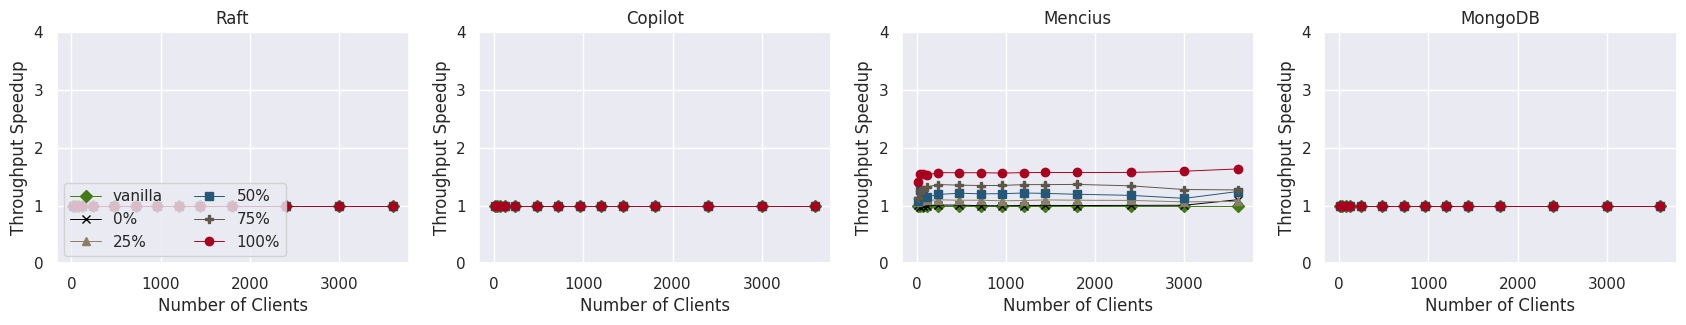

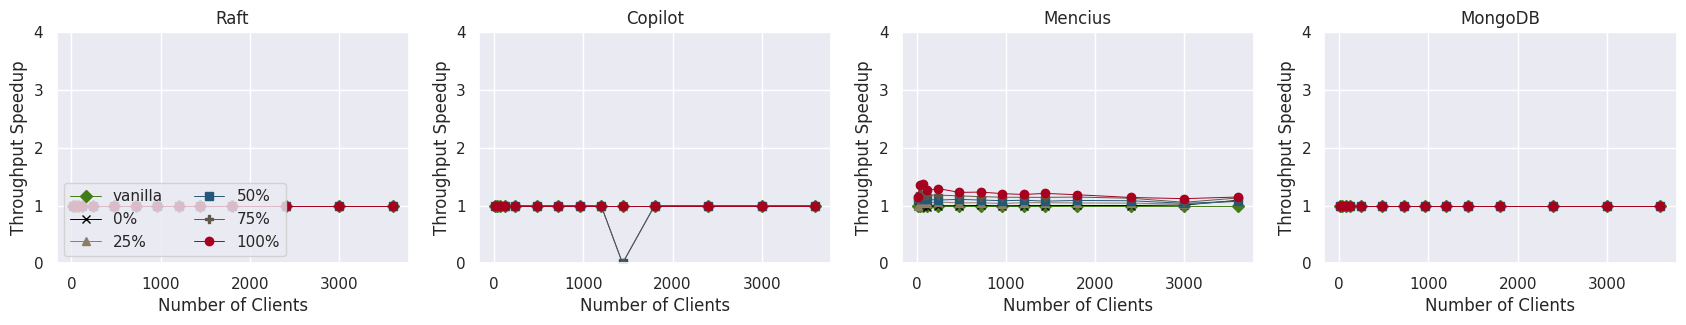

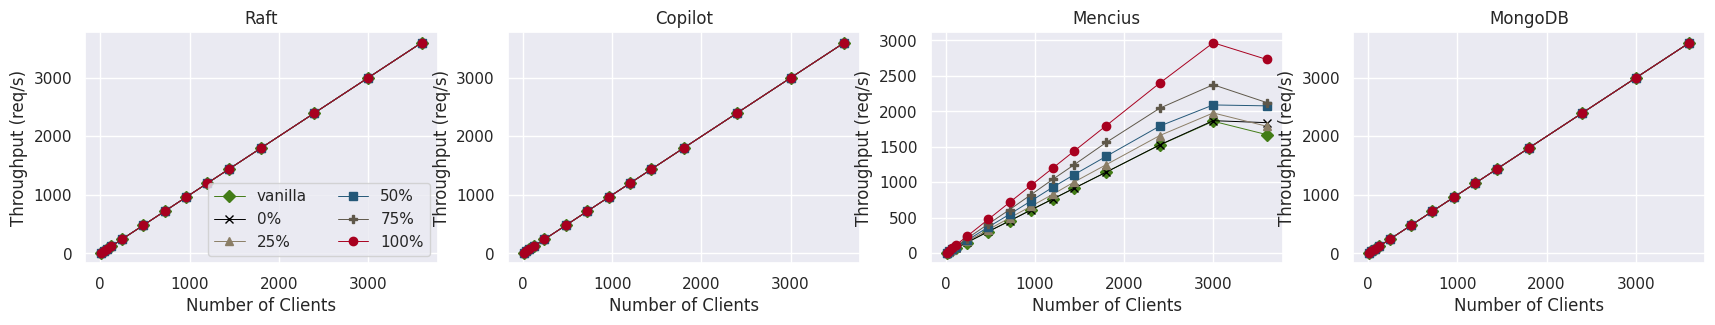

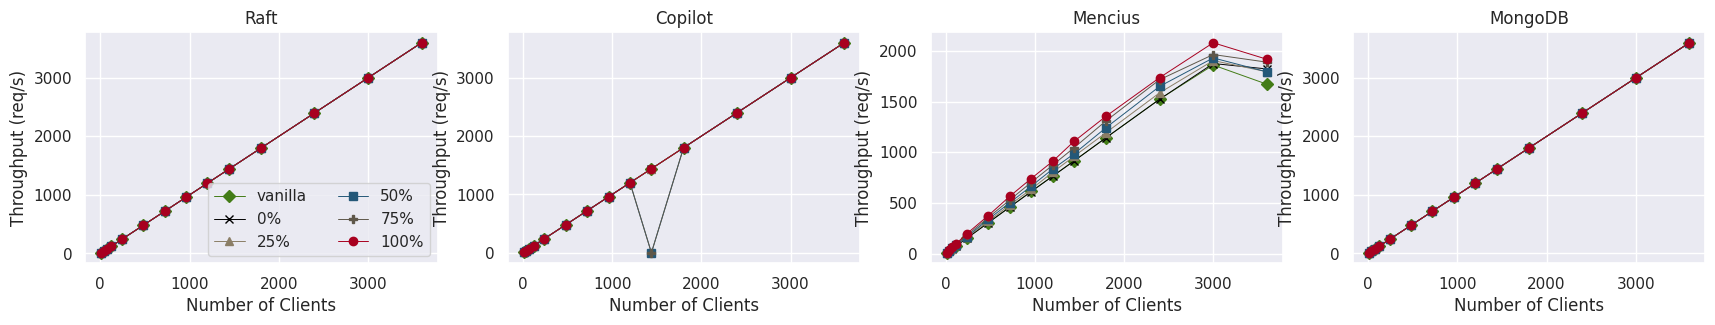

In [11]:
# Different fastpath percentages
for site in sites:
    for workload in workloads:
        
        global legend_draw
        legend_draw = False
        
        fig_throughput_pct_ratio, axes_throughput_pct_ratio = plt.subplots(nrows=1, ncols=4, figsize=(18, 3))
        
        draw_throughput(axes_throughput_pct_ratio[0], raft_jetpack[site][workload],    raft_vanilla[site],    pcts, pct_line_infos, 'Raft', True)
        draw_throughput(axes_throughput_pct_ratio[1], copilot_jetpack[site][workload], copilot_vanilla[site], pcts, pct_line_infos, 'Copilot', True)
        print("mencius_jetpack[site][workload]",mencius_jetpack[site][workload])
        print("mencius_vanilla[site]",mencius_vanilla[site])
        draw_throughput(axes_throughput_pct_ratio[2], mencius_jetpack[site][workload], mencius_vanilla[site], pcts, pct_line_infos, 'Mencius', True)
        draw_throughput(axes_throughput_pct_ratio[3], mongodb_jetpack[site][workload], mongodb_vanilla[site], pcts, pct_line_infos, 'MongoDB', True)
    
        fig_throughput_pct_ratio.subplots_adjust(left=0)
        fig_throughput_pct_ratio.savefig("throughput_pct_ratio_" + site + "_" + workload + ".pdf", bbox_inches="tight")
        print("site " + site + " workload " + workload)
        fig_throughput_pct_ratio.show()

for site in sites:
    for workload in workloads:
        
        global legend_draw
        legend_draw = False
        
        fig_throughput_pct, axes_throughput_pct = plt.subplots(nrows=1, ncols=4, figsize=(18, 3))
        
        draw_throughput(axes_throughput_pct[0], raft_jetpack[site][workload],    raft_vanilla[site],    pcts, pct_line_infos, 'Raft', False)
        draw_throughput(axes_throughput_pct[1], copilot_jetpack[site][workload], copilot_vanilla[site], pcts, pct_line_infos, 'Copilot', False)
        draw_throughput(axes_throughput_pct[2], mencius_jetpack[site][workload], mencius_vanilla[site], pcts, pct_line_infos, 'Mencius', False)
        draw_throughput(axes_throughput_pct[3], mongodb_jetpack[site][workload], mongodb_vanilla[site], pcts, pct_line_infos, 'MongoDB', False)
    
        fig_throughput_pct.subplots_adjust(left=0)
        fig_throughput_pct.savefig("throughput_pct_" + site + "_" + workload +".pdf", bbox_inches="tight")
        print("site " + site + " workload " + workload)
        fig_throughput_pct.show()

site 12c1s5r1p workload rw_1000000
site 12c1s5r1p workload rw_zipf_1


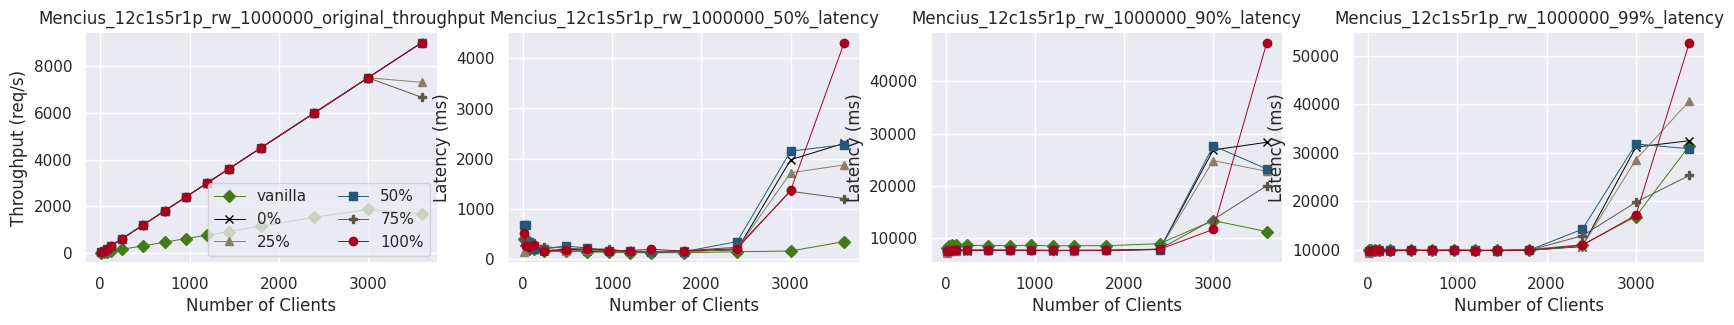

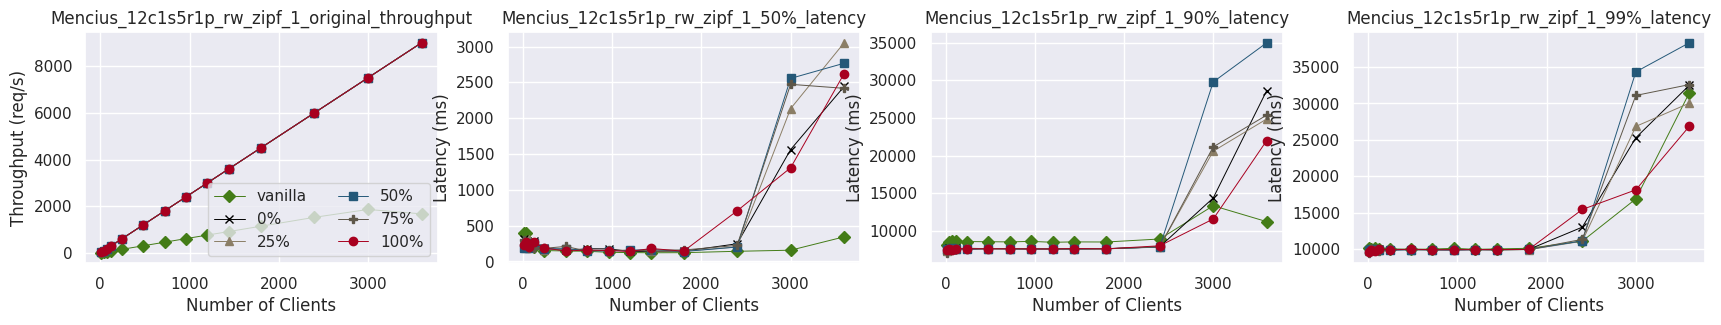

In [13]:
def draw_original(axes, data, data_vanilla, modes, l_info, title, ylabel, vanilla_ylabel, ylabel_text):
    assert len(modes) + 1 == len(l_info)
    if (len(data_vanilla)) == 0:
        return
    
    client = [12 * c for c in conc]
    
    l_vanilla = [0 for _ in conc]
    l = [[0 for _ in conc] for __ in range(len(modes))]
    
    for e in data_vanilla:
        if e["conc"] in conc:
            l_vanilla[conc_2_id[e["conc"]]] = e[vanilla_ylabel]
    for i, mode in enumerate(modes):
        for e in data[mode]:
            if e["conc"] in conc:
                l[i][conc_2_id[e["conc"]]] = e[ylabel] if e[ylabel] != None else 0
    
    l = [l_vanilla] + l
    for i in range(len(modes) + 1):
        if l[i][0] != 0:
            axes.plot(client, l[i], label=l_info[i][0], color=l_info[i][1], marker=l_info[i][2], lw=line_width)

    axes.set_title(title)
    axes.set_xlabel('Number of Clients')
    axes.set_ylabel(ylabel_text)
    
    global legend_draw
    if not legend_draw:
        axes.legend(ncol=2, loc='lower right')
        legend_draw = True

for site in sites:
    for workload in workloads:

        # print(mencius_jetpack[site][workload]["100"])
        
        global legend_draw
        legend_draw = False
        
        fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 3))

        draw_original(axes[0], mencius_jetpack[site][workload], mencius_vanilla[site], pcts, pct_line_infos, 'Mencius_' + site + "_" + workload + "_original_throughput", "original_throughput", "mid_throughput", "Throughput (req/s)")
        draw_original(axes[1], mencius_jetpack[site][workload], mencius_vanilla[site], pcts, pct_line_infos, 'Mencius_' + site + "_" + workload + "_50%_latency", "all_original_50pct", "original_protocol_50pct", "Latency (ms)")
        draw_original(axes[2], mencius_jetpack[site][workload], mencius_vanilla[site], pcts, pct_line_infos, 'Mencius_' + site + "_" + workload + "_90%_latency", "all_original_90pct", "original_protocol_90pct", "Latency (ms)")
        draw_original(axes[3], mencius_jetpack[site][workload], mencius_vanilla[site], pcts, pct_line_infos, 'Mencius_' + site + "_" + workload + "_99%_latency", "all_original_99pct", "original_protocol_99pct", "Latency (ms)")
        
        fig.subplots_adjust(left=0)
        fig.savefig("original_path_" + site + "_" + workload + ".pdf", bbox_inches="tight")
        print("site " + site + " workload " + workload)
        fig.show()

site 12c1s5r1p workload rw_1000000
site 12c1s5r1p workload rw_zipf_1


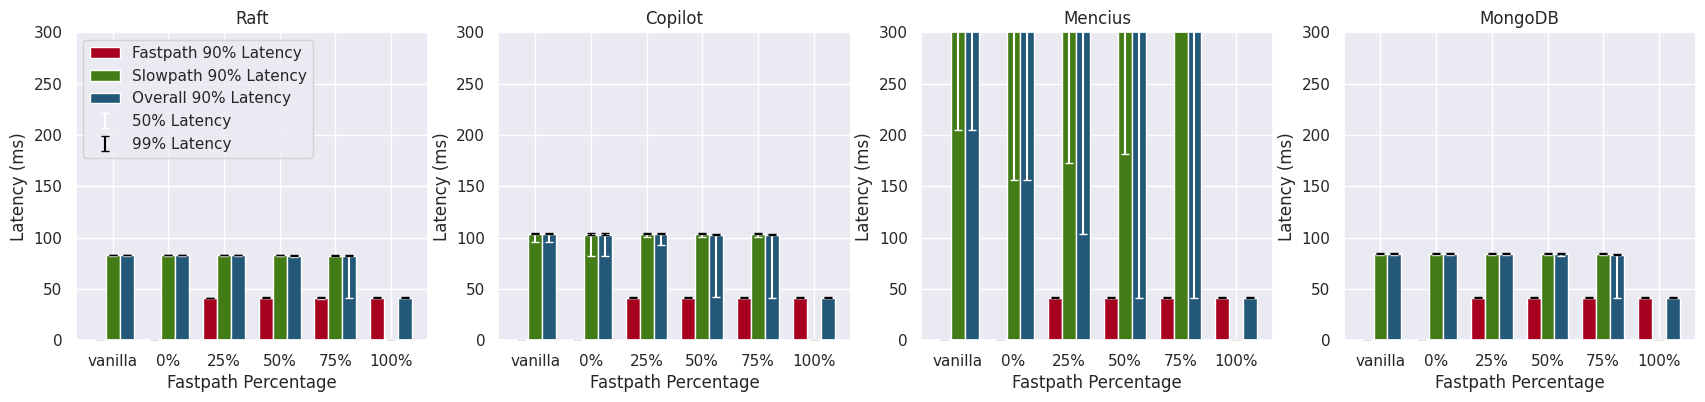

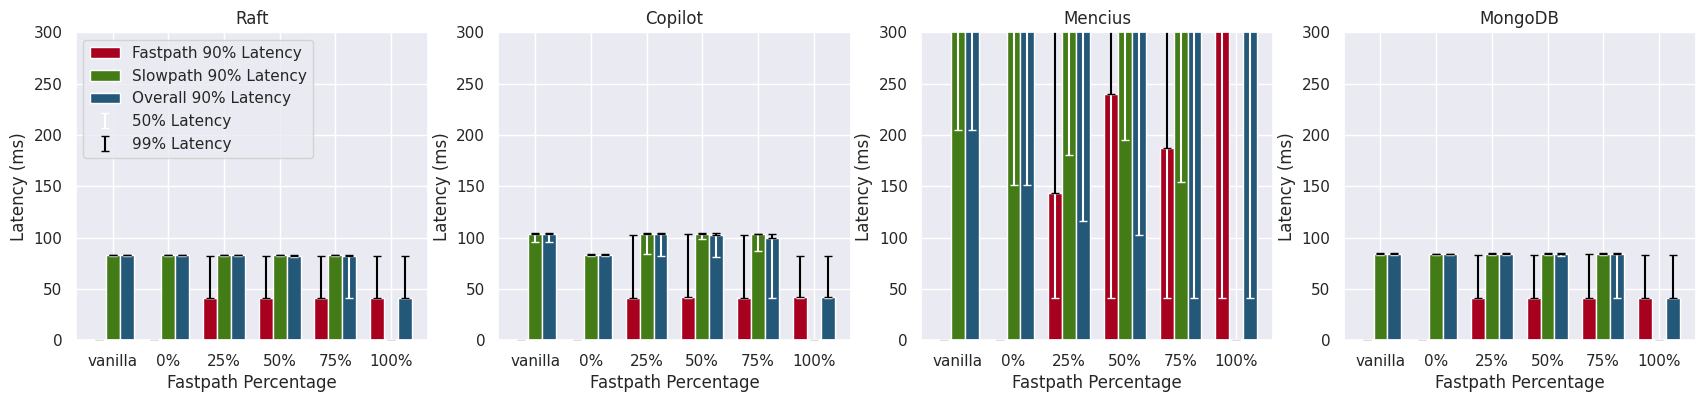

In [15]:
def draw_latency(axes, data_pct, data_vanilla, title, ylabel_name):
    ylabels = ["fastpath_50pct", "original_protocol_50pct", "latency50pct", \
               "fastpath_90pct", "original_protocol_90pct", "latency90pct", \
               "fastpath_99pct", "original_protocol_99pct", "latency99pct"]
    
    # categories = ["vanilla", "0pct", "25pct", "50pct", "75pct", "100pct", "adaptive"]
    categories = ["vanilla", "0%", "25%", "50%", "75%", "100%"]
    l = [[0 for _ in range(len(categories))] for __ in range(9)]

    # for e in data_vanilla:
    #     if e["conc"] == fixed_conc_number:
    #         print(e)

    for e in data_vanilla:
        if e["conc"] == fixed_conc_number:
            for j, ylabel in enumerate(ylabels):
                l[j][0] = e[ylabel]
    for i, pct in enumerate(pcts):
        for e in data_pct[pct]:
            if e["conc"] == fixed_conc_number:
                for j, ylabel in enumerate(ylabels):
                    l[j][i+1] = e[ylabel]
    l = [[0 if x is None else x for x in sublist] for sublist in l]
    # print(l)
    bar_width = 0.25

    # axes.bar     (np.arange(len(categories)) - bar_width, l[0], width=bar_width, label='Fastpath 50%', color="#F47983")
    # axes.bar(np.arange(len(categories)) - bar_width, [a - b for a, b in zip(l[3], l[0])], width=bar_width, bottom=l[0], label='Fastpath 90%', color="#FF2121")
    # axes.bar(np.arange(len(categories)) - bar_width, [a - b for a, b in zip(l[6], l[3])], width=bar_width, bottom=l[3], label='Fastpath 99%', color="#BE002F")
    # axes.bar     (np.arange(len(categories)),             l[1], width=bar_width, label='Slowpath 50%', color="#00E500")
    # axes.bar(np.arange(len(categories)),             [a - b for a, b in zip(l[4], l[1])], width=bar_width, bottom=l[1], label='Slowpath 90%', color="#0EB83A")
    # axes.bar(np.arange(len(categories)),             [a - b for a, b in zip(l[7], l[4])], width=bar_width, bottom=l[4], label='Slowpath 99%', color="#057748")
    # axes.bar     (np.arange(len(categories)) + bar_width, l[2], width=bar_width, label='Overall 50%', color="#70F3FF")
    # axes.bar(np.arange(len(categories)) + bar_width, [a - b for a, b in zip(l[5], l[2])], width=bar_width, bottom=l[2], label='Overall 90%', color="#44CEF6")
    # axes.bar(np.arange(len(categories)) + bar_width, [a - b for a, b in zip(l[8], l[5])], width=bar_width, bottom=l[5], label='Overall 99%', color="#177CB0")
    
    zeros = [0 for _ in range(len(categories))]
    
    axes.bar     (np.arange(len(categories)) - bar_width, l[3], width=bar_width, label='Fastpath 90% Latency', color=pct_line_infos[5][1])
    axes.bar     (np.arange(len(categories)),             l[4], width=bar_width, label='Slowpath 90% Latency', color=pct_line_infos[0][1])
    axes.bar     (np.arange(len(categories)) + bar_width, l[5], width=bar_width, label='Overall 90% Latency', color=pct_line_infos[3][1])
    
    axes.errorbar(np.arange(len(categories)) - bar_width, l[3], yerr=([a - b for a, b in zip(l[3], l[0])], zeros), fmt='none', capsize=3, color='white', label='50% Latency')
    axes.errorbar(np.arange(len(categories)) - bar_width, l[3], yerr=(zeros, [a - b for a, b in zip(l[6], l[3])]), fmt='none', capsize=3, color='black', label='99% Latency')
    
    axes.errorbar(np.arange(len(categories)),             l[4], yerr=([a - b for a, b in zip(l[4], l[1])], zeros), fmt='none', capsize=3, color='white')
    axes.errorbar(np.arange(len(categories)),             l[4], yerr=(zeros, [a - b for a, b in zip(l[7], l[4])]), fmt='none', capsize=3, color='black')
    
    axes.errorbar(np.arange(len(categories)) + bar_width, l[5], yerr=([a - b for a, b in zip(l[5], l[2])], zeros), fmt='none', capsize=3, color='white')
    axes.errorbar(np.arange(len(categories)) + bar_width, l[5], yerr=(zeros, [a - b for a, b in zip(l[8], l[5])]), fmt='none', capsize=3, color='black')
    
    axes.set_title(title)
    axes.set_xlabel('Fastpath Percentage')
    axes.set_ylabel(ylabel_name)
    axes.set_ylim(0, 300)
    axes.set_xticks(np.arange(len(categories)), categories)

    global legend_draw
    if not legend_draw:
        axes.legend(loc='upper left')
        legend_draw = True

for site in sites:
    for workload in workloads:
        
        global legend_draw
        legend_draw = False
        
        fig_latency, axes_latency = plt.subplots(nrows=1, ncols=4, figsize=(18, 4))
        
        draw_latency(axes_latency[0], raft_jetpack[site][workload],    raft_vanilla[site],    'Raft',    'Latency (ms)')
        draw_latency(axes_latency[1], copilot_jetpack[site][workload], copilot_vanilla[site], 'Copilot', 'Latency (ms)')
        draw_latency(axes_latency[2], mencius_jetpack[site][workload], mencius_vanilla[site], 'Mencius', 'Latency (ms)')
        draw_latency(axes_latency[3], mongodb_jetpack[site][workload], mongodb_vanilla[site], 'MongoDB', 'Latency (ms)')
    
        # draw_latency(axes_latency[0], raft_jetpack[workload], raft_vanilla, 'Raft ' + workload + ' Medium Latency', 'Latency (ms)')
        # draw_latency(axes_latency[1], copilot_jetpack[workload], copilot_vanilla, 'Copilot ' + workload + ' Medium Latency', 'Latency (ms)')
        # draw_latency(axes_latency[2], mencius_jetpack[workload], mencius_vanilla, 'Mencius ' + workload + ' Medium Latency', 'Latency (ms)')
        # draw_latency(axes_latency[3], mongodb_jetpack[workload], mongodb_vanilla, 'MongoDB ' + workload + ' Medium Latency', 'Latency (ms)')
    
        fig_latency.subplots_adjust(left=0)
        fig_latency.savefig("latency_pct_" + site + "_" + workload + ".pdf", bbox_inches="tight")
        print("site " + site + " workload " + workload)
        fig_latency.show()

site 12c1s5r1p workload rw_1000000
site 12c1s5r1p workload rw_zipf_1


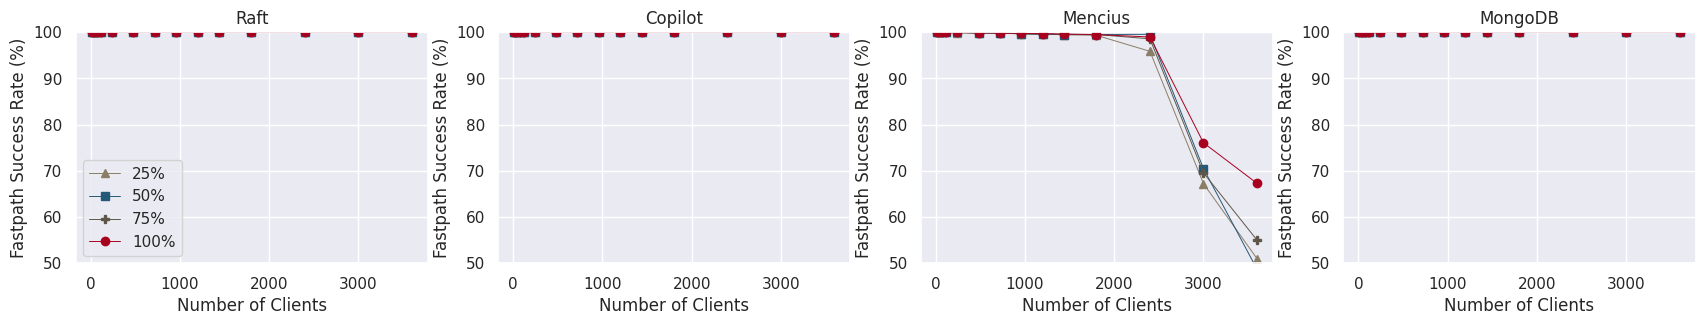

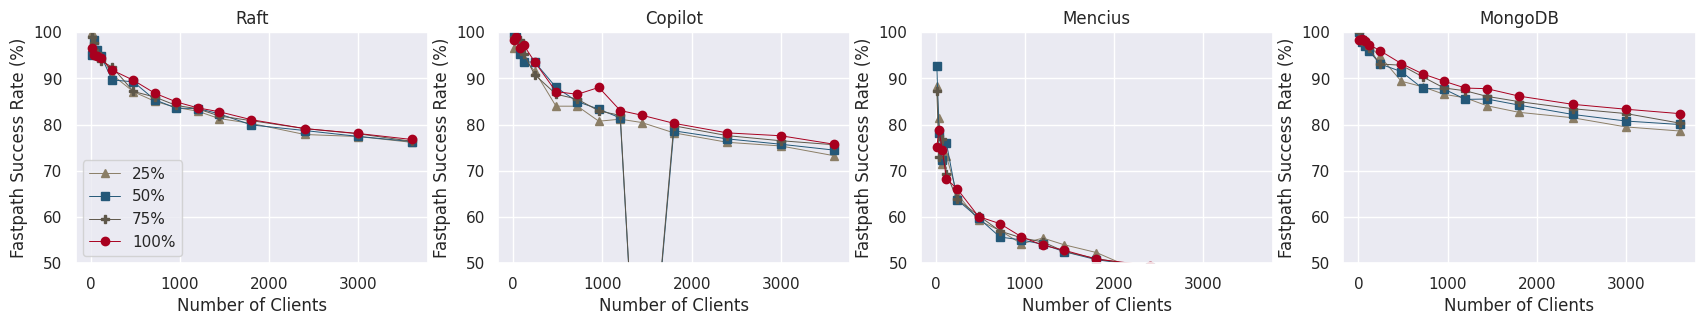

In [16]:
def draw_fastpath_success_rate(axes, data, modes, l_info, title):
    
    client = [c * 12 for c in conc]
    l = [[0 for _ in conc] for __ in range(len(modes))]
    
    for i, mode in enumerate(modes):
        for e in data[mode]:
            if e["conc"] in conc:
                l[i][conc_2_id[e["conc"]]] = e["fastpath_success_pct"]

    assert len(modes) == len(l_info)
    for i in range(len(modes)):
        # if (l[i][i] != 0):
        axes.plot(client, l[i], label=l_info[i][0], color=l_info[i][1], marker=l_info[i][2], lw=line_width)
        
    axes.set_title(title)
    axes.set_xlabel('Number of Clients')
    axes.set_ylabel('Fastpath Success Rate (%)')
    axes.set_ylim(50, 100)

    global legend_draw
    if not legend_draw:
        axes.legend(loc='lower left' if l[-1][-1] > 70 else 'upper right')
        legend_draw = True

    min_rates = [100.0 for _ in range(len(modes))]
    for i in range(len(modes)):
        for j in range(len(conc)):
            min_rates[i] = min(l[i][j], min_rates[i])
    return min_rates

# Different fastpath percentages

# print("Different fastpath percentages")

for site in sites:
    for workload in workloads:
        global legend_draw
        legend_draw = False
        
        fig_fastpath_success_rate_pct, axes_fastpath_success_rate_pct = plt.subplots(nrows=1, ncols=4, figsize=(18, 3))
    
        draw_fastpath_success_rate(axes_fastpath_success_rate_pct[0], raft_jetpack[site][workload],    pcts[1:], pct_line_infos[2:], 'Raft')
        draw_fastpath_success_rate(axes_fastpath_success_rate_pct[1], copilot_jetpack[site][workload], pcts[1:], pct_line_infos[2:], 'Copilot')
        draw_fastpath_success_rate(axes_fastpath_success_rate_pct[2], mencius_jetpack[site][workload], pcts[1:], pct_line_infos[2:], 'Mencius')
        draw_fastpath_success_rate(axes_fastpath_success_rate_pct[3], mongodb_jetpack[site][workload], pcts[1:], pct_line_infos[2:], 'MongoDB')
        
        fig_fastpath_success_rate_pct.subplots_adjust(left=0)
        fig_fastpath_success_rate_pct.savefig("fastpath_success_rate_pct_" + site + "_" + workload + ".pdf", bbox_inches="tight")
        print("site " + site + " workload " + workload)
        fig_fastpath_success_rate_pct.show()

# # Different zipf alphas

# print("Different zipf alphas")

# fig_fastpath_success_rate_zipf, axes_fastpath_success_rate_zipf = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

# min_rates_raft    = draw_fastpath_success_rate(axes_fastpath_success_rate_zipf[0], raft_zipf, zipf_modes, zipf_line_infos, 'Raft-related Fastpath Success Rate')
# min_rates_copilot = draw_fastpath_success_rate(axes_fastpath_success_rate_zipf[1], copilot_zipf, zipf_modes, zipf_line_infos, 'Copilot-related Fastpath Success Rate')
# min_rates_mencius = draw_fastpath_success_rate(axes_fastpath_success_rate_zipf[2], mencius_zipf, zipf_modes, zipf_line_infos, 'Mencius-related Fastpath Success Rate')

# print(zipf_modes)
# print("Raft    Min Rates:", min_rates_raft)
# print("Copilot Min Rates:", min_rates_copilot)
# print("Mencius Min Rates:", min_rates_mencius)

# fig_fastpath_success_rate_zipf.savefig("fastpath_success_rate_zipf.pdf", bbox_inches="tight")
# fig_fastpath_success_rate_zipf.show()

site 12c1s5r1p workload rw_1000000
site 12c1s5r1p workload rw_zipf_1


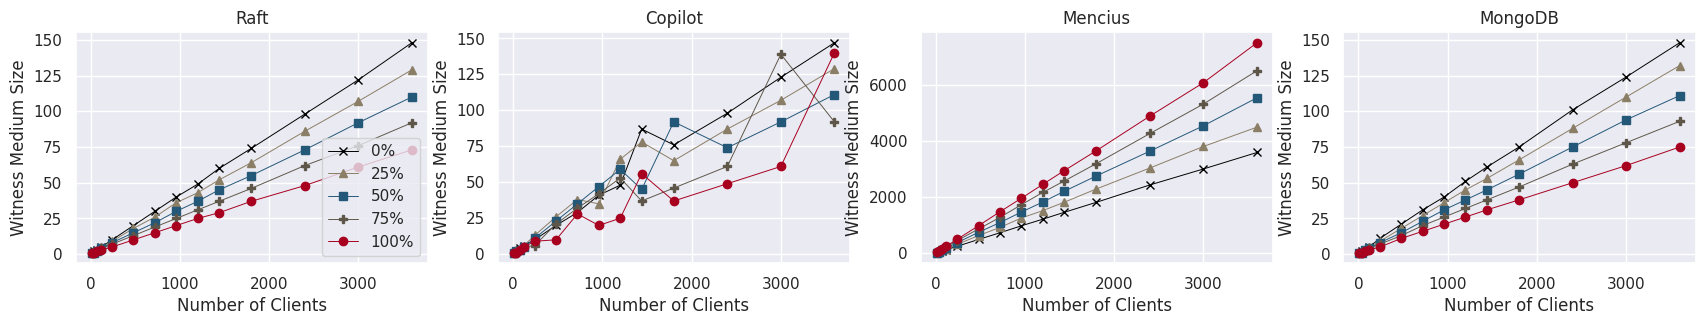

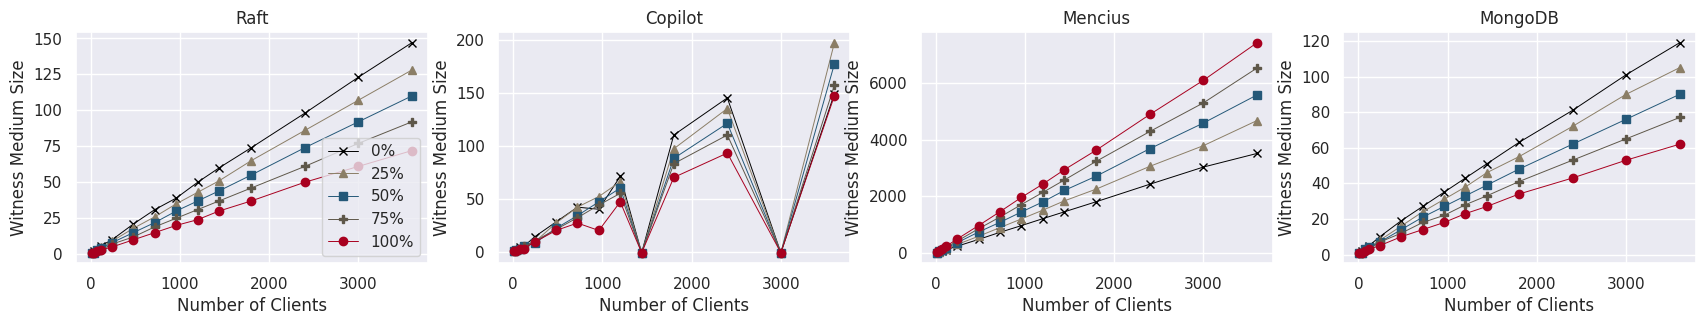

In [17]:
def draw_witness_size(axes, data, modes, l_info, title):
    
    client = [c * 12 for c in conc]
    l = [[0 for _ in conc] for __ in range(len(modes))]
    
    for i, mode in enumerate(modes):
        for e in data[mode]:
            if e["conc"] in conc:
                l[i][conc_2_id[e["conc"]]] = e["witness0_50pct"]

    assert len(modes) == len(l_info)
    for i in range(len(modes)):
        # if (l[i][i] != 0):
        axes.plot(client, l[i], label=l_info[i][0], color=l_info[i][1], marker=l_info[i][2], lw=line_width)
        
    axes.set_title(title)
    axes.set_xlabel('Number of Clients')
    axes.set_ylabel('Witness Medium Size')
    # axes.set_ylim(50, 100)

    global legend_draw
    if not legend_draw:
        axes.legend(loc='lower right')
        # axes.legend(loc='lower left' if l[-1][-1] > 70 else 'upper right')
        legend_draw = True

for site in sites:
    for workload in workloads:
        global legend_draw
        legend_draw = False
        
        fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 3))
    
        draw_witness_size(axes[0], raft_jetpack[site][workload],    pcts[0:], pct_line_infos[1:], 'Raft')
        draw_witness_size(axes[1], copilot_jetpack[site][workload], pcts[0:], pct_line_infos[1:], 'Copilot')
        draw_witness_size(axes[2], mencius_jetpack[site][workload], pcts[0:], pct_line_infos[1:], 'Mencius')
        draw_witness_size(axes[3], mongodb_jetpack[site][workload], pcts[0:], pct_line_infos[1:], 'MongoDB')
        
        fig.subplots_adjust(left=0)
        fig.savefig("witness_medium_size_" + site + "_" + workload + ".pdf", bbox_inches="tight")
        print("site " + site + " workload " + workload)
        fig.show()

jetpack data {'rw_1000000': {'0': [{'latency': '20', 'mode': 'rule_fpga_raft', 'site': '12c1s5r1p', 'workload': 'rw_1000000', 'conc': 1, 'finish_countdown': '0', 'fastpath_timeout': '1000000', 'wait_commit_timeout': '0', 'instance_commit_timeout': '1000', 'fastpath_rate': '0', 'duration': '30', 'throughput': 12.0, 'mid_throughput': 12.0, 'fastpath_count': 0, 'fastpath_50pct': None, 'fastpath_ave': None, 'fast_original_count': 0, 'fast_original_50pct': None, 'original_protocol_count': 120, 'original_protocol_50pct': 81.72, 'original_protocol_ave': 81.76, 'latency50pct': 81.72, 'latency90pct': 82.76, 'latency99pct': 83.21, 'latency_ave': 81.76, 'cpu5_medium': 4.8, 'cpu6_medium': 4.8, 'cpu7_medium': 4.8, 'cpu8_medium': 4.3, 'cpu9_medium': 4.8, 'clientall_medium': 1.0, 'fastpath_attempted': 0, 'fastpath_successed': 0, 'witness0_50pct': 1.0, 'witness0_90pct': 2.0, 'witness0_99pct': 2.0, 'witness0_ave': 0.91, 'witness1_50pct': -1.0, 'witness1_90pct': -1.0, 'witness1_99pct': -1.0, 'witness1_a

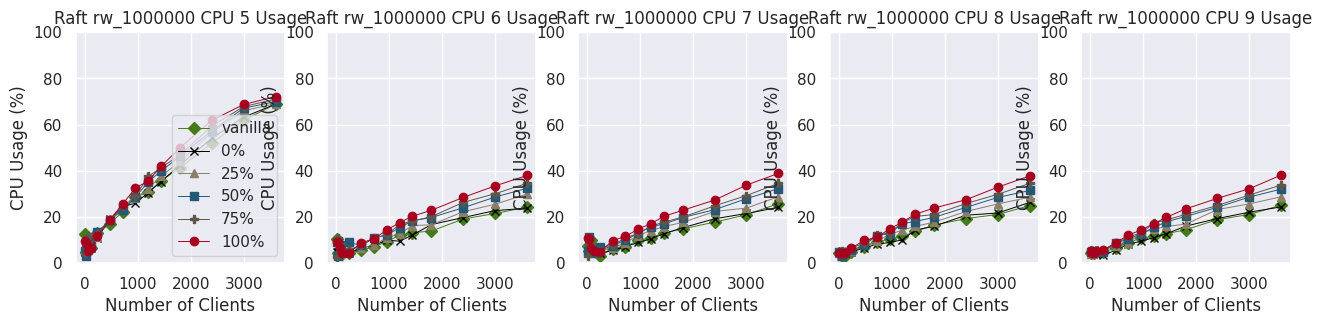

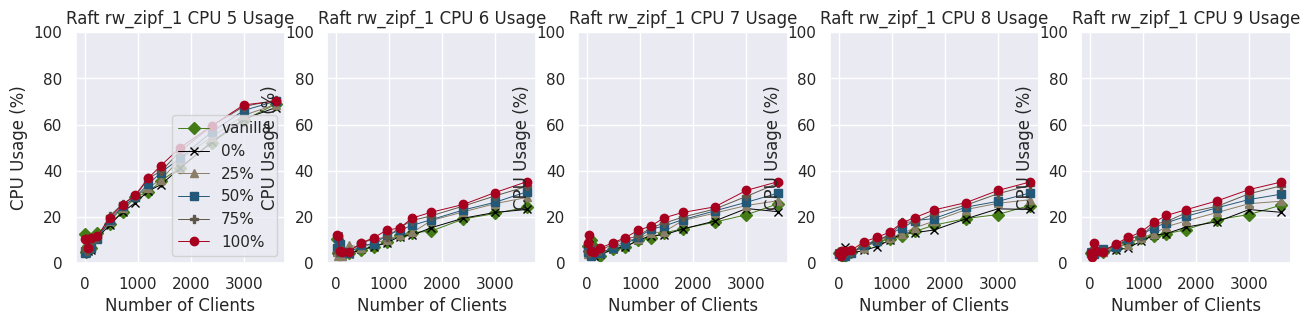

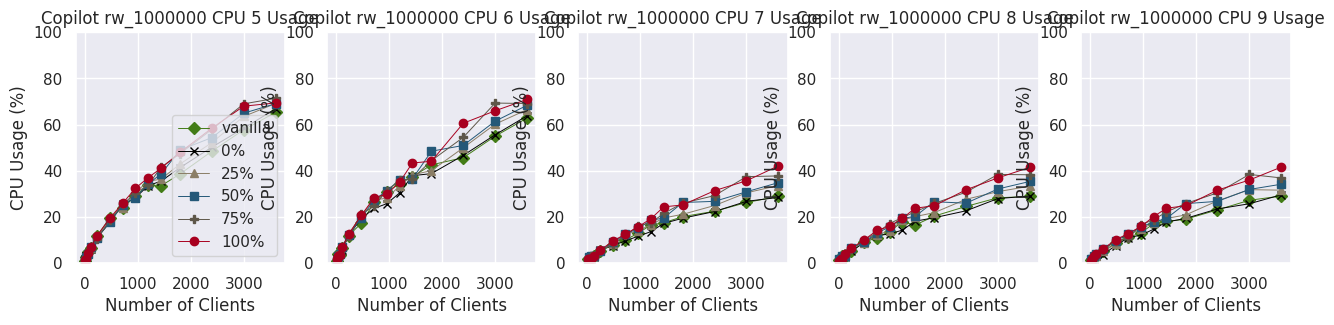

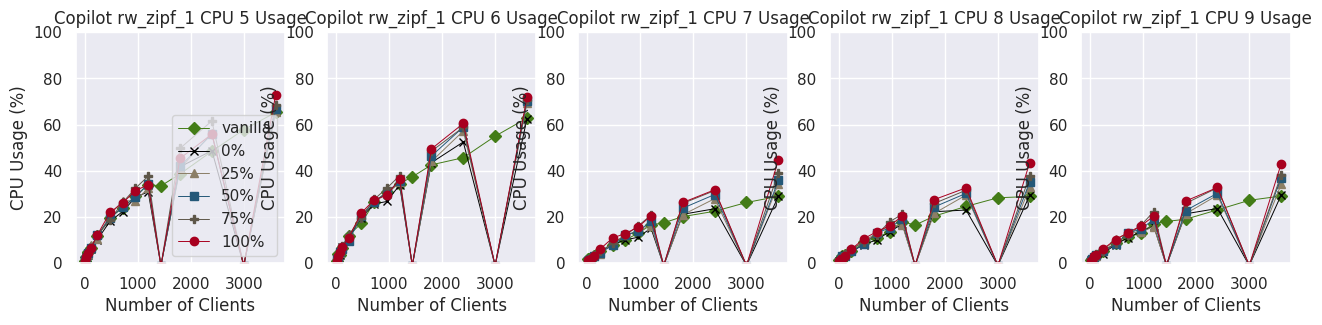

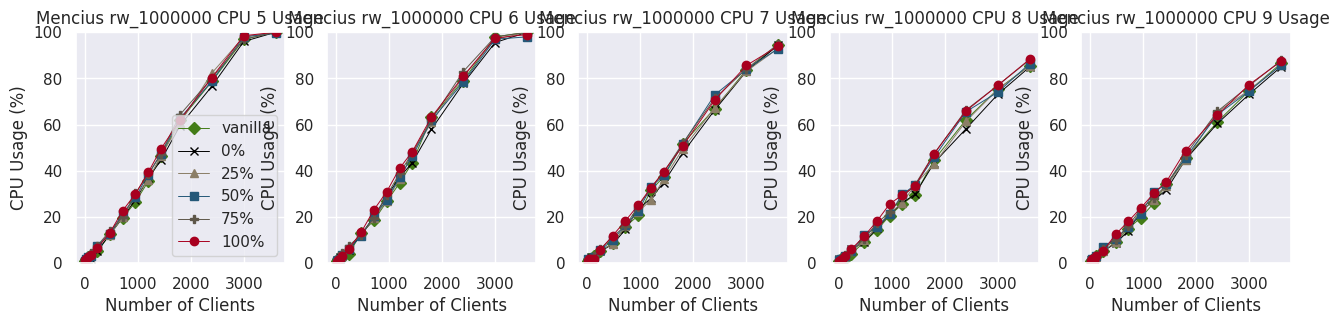

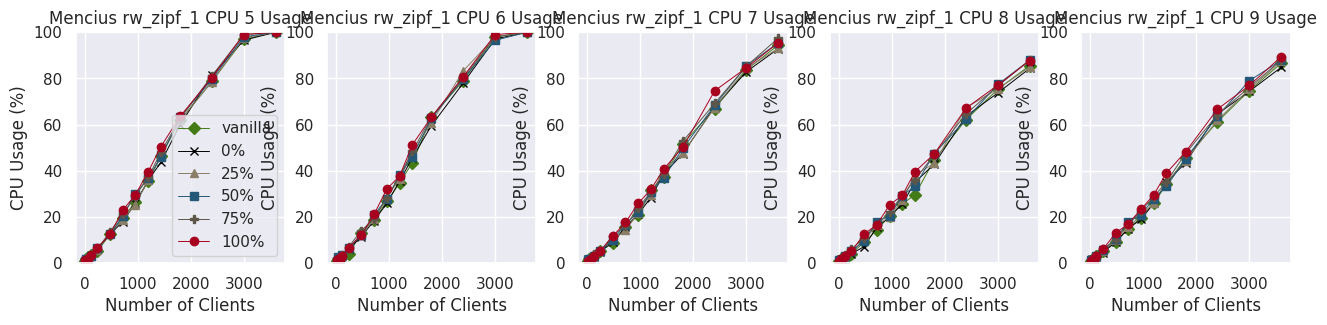

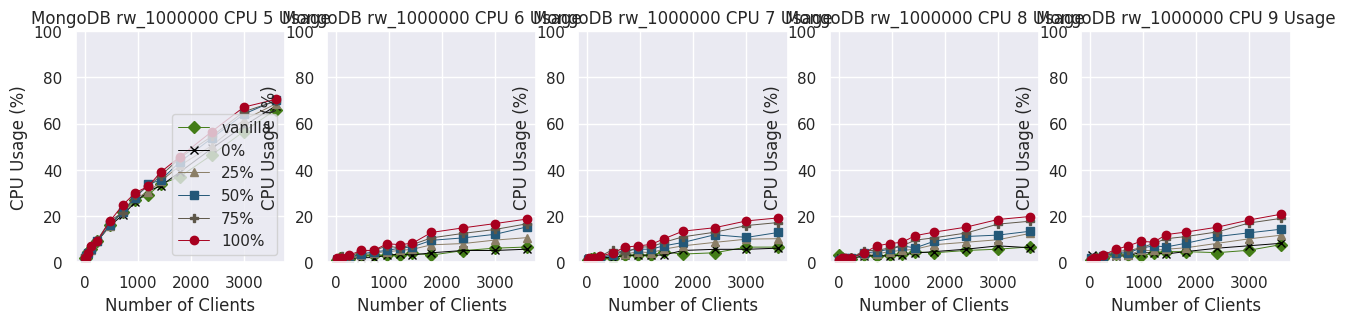

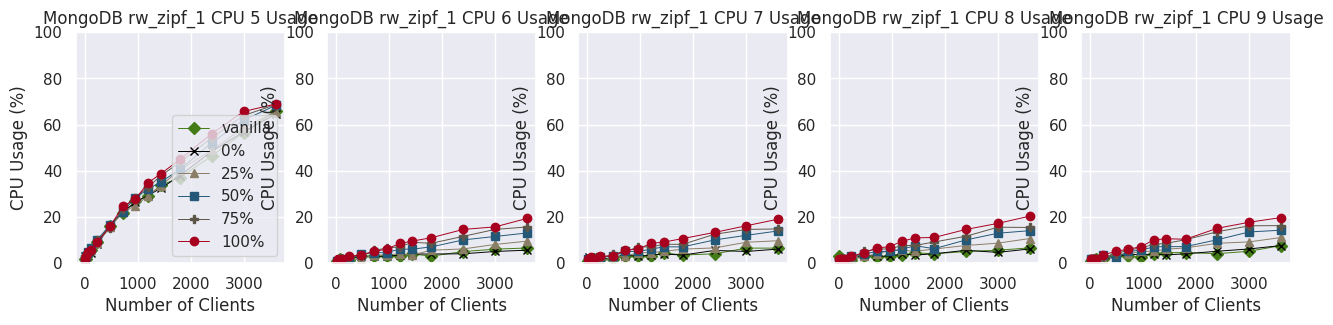

In [20]:
def draw_cpu_usage(axes, ylabel, data_pct, data_vanilla, title, ylabel_name, l_info):
    # print(data_pct)
    client = [c * 12 for c in conc]
    l = [[0 for _ in conc] for __ in range(len(pcts)+1)]
    for e in data_vanilla:
        if e["conc"] in conc:
            l[0][conc_2_id[e["conc"]]] = e[ylabel]
    # for i, pct in enumerate(["0", "25", "50", "75", "100", "adaptive"]):
    for i, pct in enumerate(pcts):
        for e in data_pct[pct]:
            if e["conc"] in conc:
                l[i+1][conc_2_id[e["conc"]]] = e[ylabel]

    for i in range(len(l)):
        axes.plot(client, l[i], label=l_info[i][0], color=l_info[i][1], marker=l_info[i][2], lw=line_width)
    
    axes.set_title(title)
    axes.set_xlabel('Number of Clients')
    axes.set_ylim(0, 100)
    axes.set_ylabel(ylabel_name)
    
    global legend_draw
    if not legend_draw:
        axes.legend(loc='lower right')
        legend_draw = True

protocols = [
    (raft_jetpack[sites[0]], raft_vanilla[sites[0]], "Raft"), 
    (copilot_jetpack[sites[0]], copilot_vanilla[sites[0]], "Copilot"), 
    (mencius_jetpack[sites[0]], mencius_vanilla[sites[0]], "Mencius"), 
    (mongodb_jetpack[sites[0]], mongodb_vanilla[sites[0]], "MongoDB")
]

for jetpack_data, vanilla_data, protocol_name in protocols:
    print("jetpack data", jetpack_data)
    print("vallina_Data", vanilla_data)
    print("protocol_name", protocol_name)
    for workload in workloads:
        global legend_draw
        legend_draw = False
        
        fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(13.5, 3))
        
        draw_cpu_usage(axes[0], "cpu5_medium", jetpack_data[workload], vanilla_data, protocol_name + ' ' + workload + ' CPU 5 Usage', 'CPU Usage (%)', pct_line_infos)
        draw_cpu_usage(axes[1], "cpu6_medium", jetpack_data[workload], vanilla_data, protocol_name + ' ' + workload + ' CPU 6 Usage', 'CPU Usage (%)', pct_line_infos)
        draw_cpu_usage(axes[2], "cpu7_medium", jetpack_data[workload], vanilla_data, protocol_name + ' ' + workload + ' CPU 7 Usage', 'CPU Usage (%)', pct_line_infos)
        draw_cpu_usage(axes[3], "cpu8_medium", jetpack_data[workload], vanilla_data, protocol_name + ' ' + workload + ' CPU 8 Usage', 'CPU Usage (%)', pct_line_infos)
        draw_cpu_usage(axes[4], "cpu9_medium", jetpack_data[workload], vanilla_data, protocol_name + ' ' + workload + ' CPU 9 Usage', 'CPU Usage (%)', pct_line_infos)
        
        fig.subplots_adjust(left=0)
        fig.savefig("cpu_usage_pct_" + protocol_name + "_" + workload + ".pdf", bbox_inches="tight")
        fig.show()


In [19]:
protocols

[({'rw_1000000': {'0': [{'latency': '20',
      'mode': 'rule_mencius',
      'site': '12c1s5r1p',
      'workload': 'rw_1000000',
      'conc': 1,
      'finish_countdown': '0',
      'fastpath_timeout': '1000000',
      'wait_commit_timeout': '0',
      'instance_commit_timeout': '1000',
      'fastpath_rate': '0',
      'duration': '30',
      'throughput': 12.0,
      'mid_throughput': 8.6,
      'fastpath_count': 0,
      'fastpath_50pct': None,
      'fastpath_ave': None,
      'fast_original_count': 0,
      'fast_original_50pct': None,
      'original_protocol_count': 86,
      'original_protocol_50pct': 253.41,
      'original_protocol_ave': 2473.07,
      'latency50pct': 253.41,
      'latency90pct': 8458.41,
      'latency99pct': 10460.39,
      'latency_ave': 2473.07,
      'cpu5_medium': -1,
      'cpu6_medium': -1,
      'cpu7_medium': -1,
      'cpu8_medium': -1,
      'cpu9_medium': -1,
      'clientall_medium': 3.5,
      'fastpath_attempted': 0,
      'fastpath_succes

In [36]:
def find_turning_point_conc(ylabel, data_pct, data_vanilla):
    l = [[0 for _ in conc] for __ in range(2)]
    
    for e in data_vanilla:
        l[0][conc_2_id[e["conc"]]] = e[ylabel]
        
    for e in data_pct["100"]:
        l[1][conc_2_id[e["conc"]]] = e[ylabel]
        
    for i in range(len(l[0])):
        if l[1][i] < l[0][i]:
            return conc[i - 1], conc[i]

    return -1, -1


def find_turning_point_config(ylabel, data_pct, data_vanilla, conc_num):
    fastpath_config = -1
    for e in data_pct["100"]:
        if e["conc"] == conc_num:
            fastpath_config = e[ylabel]
            
    vanilla_config = -1
    for e in data_vanilla:
        if e["conc"] == conc_num:
            vanilla_config = e[ylabel]
            
    return fastpath_config, vanilla_config

tp_conc_raft_0, tp_conc_raft_1 = find_turning_point_conc("mid_throughput", raft_pct, raft_vanilla)
tp_conc_copilot_0, tp_conc_copilot_1 = find_turning_point_conc("mid_throughput", copilot_pct, copilot_vanilla)
tp_conc_mencius_0, tp_conc_mencius_1 = find_turning_point_conc("mid_throughput", mencius_pct, mencius_vanilla)
1
tp_data = [
    ("Raft before turning", raft_pct, raft_vanilla, tp_conc_raft_0),
    ("Raft after turning", raft_pct, raft_vanilla, tp_conc_raft_1),
    ("Copilot before turning", copilot_pct, copilot_vanilla, tp_conc_copilot_0),
    ("Copilot after turning", copilot_pct, copilot_vanilla, tp_conc_copilot_1),
    ("Mencius before turning", mencius_pct, mencius_vanilla, tp_conc_mencius_0),
    ("Mencius after turning", mencius_pct, mencius_vanilla, tp_conc_mencius_1),
]

for protocol, data, vanilla_data, tp_conc in tp_data:
    tp_fastpath_success_rate, tp_vanilla_success_rate = find_turning_point_config("fastpath_success_pct", data, vanilla_data, tp_conc)
    tp_fastpath_cpu0,         tp_vanilla_cpu0         = find_turning_point_config("cpu0_medium",          data, vanilla_data, tp_conc)
    tp_fastpath_cpu1,         tp_vanilla_cpu1         = find_turning_point_config("cpu1_medium",          data, vanilla_data, tp_conc)
    tp_fastpath_cpu2,         tp_vanilla_cpu2         = find_turning_point_config("cpu2_medium",          data, vanilla_data, tp_conc)
    print(protocol, "turning point:", "conc 12 *", tp_conc, "=", 12 * tp_conc, ", fastpath_success_pct:", tp_fastpath_success_rate, \
          ", cpu:", tp_fastpath_cpu0, tp_fastpath_cpu1, tp_fastpath_cpu2, ", ave cpu: ", (tp_fastpath_cpu0 + tp_fastpath_cpu1 + tp_fastpath_cpu2) / 3)
    


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/users/cwang/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_478702/3550304254.py", line 30, in <module>
    tp_conc_raft_0, tp_conc_raft_1 = find_turning_point_conc("mid_throughput", raft_pct, raft_vanilla)
NameError: name 'raft_pct' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/users/cwang/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "/home/users/cwang/.local/lib/python3.8/site-packages/IPython/core/ultratb.py", line 1396, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/home/users/cwang/.local/lib/python3.8/site-packages/IPython/core/ultratb.py", line 1287, in structured_traceback
    return 